### Importing the modules

In [17]:
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.morphology import convex_hull_image
from skimage.feature import canny
from skimage import measure

import matplotlib.pyplot as plt
from matplotlib import cm

### Load a Reference Image

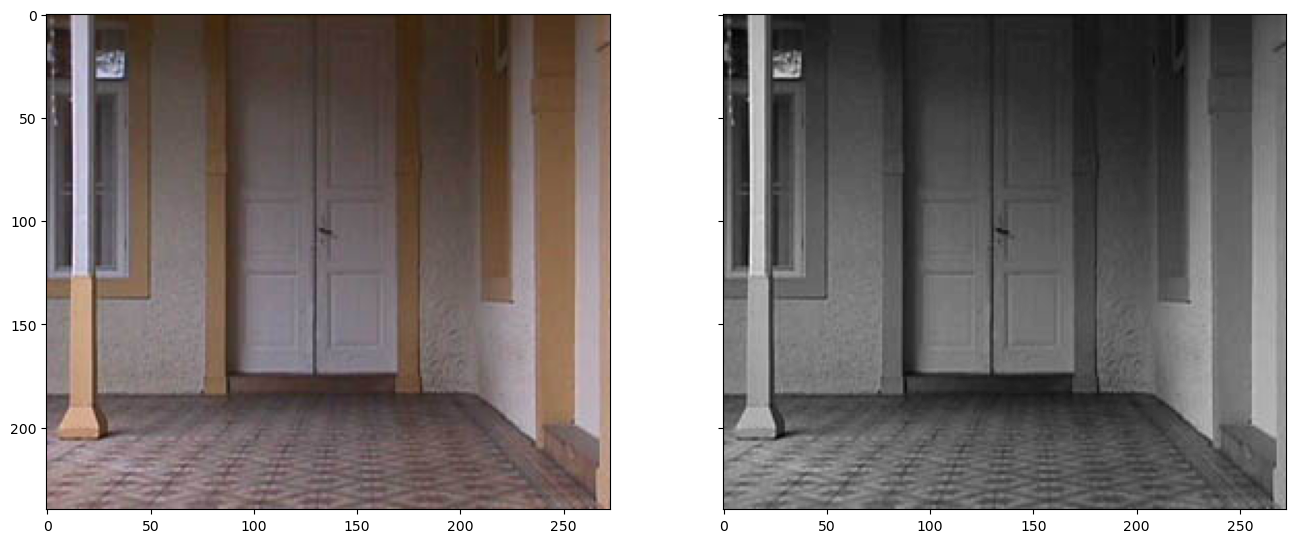

In [18]:
# Load the image in color (OpenCV standard = BGR)
ref_orig = cv2.imread("Data/ref.jpg", cv2.IMREAD_COLOR)
# Convert to RGB
ref_orig = cv2.cvtColor(ref_orig, cv2.COLOR_BGR2RGB)

# Load the image in grayscale
ref_gray = cv2.imread("Data/ref.jpg", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(ref_orig)
ax[1].imshow(ref_gray, 'gray')

### List of Imagens to be evaluated

In [19]:
img = os.listdir("Data/im")

In [20]:
def Img_Proc(image, thresh, kernel_open, kernel_close, show_color = False, show_diff = False, 
         show_tresh = False, show_open = False, show_close = False, show_mask = True, save_lim = False):
    
    
    # Load the image in color (OpenCV standard = BGR)
    orig = cv2.imread("Data/im/" + image, cv2.IMREAD_COLOR)

    # Convert to RGB
    orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

    # Load the image in grayscale
    gray = cv2.imread("Data/im/" + image, cv2.IMREAD_GRAYSCALE)

    # Show the images
    if show_color == True:
        fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
        ax = axes.ravel()
        ax[0].imshow(orig)
        ax[1].imshow(gray, 'gray')


    # Calculate the absolute difference between two images
    change = cv2.absdiff(gray, ref_gray)

    # Show the diference between the images
    if show_diff == True:
        plt.figure(figsize = (12,10))
        plt.imshow(change, 'gray')

    # Threshold
    mode = eval('cv2.THRESH_BINARY')
    th, dst = cv2.threshold(change, thresh, 255,mode)

    # Show the threshold effect
    if show_tresh == True:
        plt.figure(figsize = (12,10))
        plt.imshow(masked, 'gray')

    # Opening Kernel
    opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel_open)

    # Show the opening kernel effect
    if show_open == True:
        plt.figure(figsize = (12,10))
        plt.imshow(opening, 'gray')

    # Closing kernal
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_close)

    # Show the closing kernel effect
    if show_close == True:
        plt.figure(figsize = (12,10))
        plt.imshow(closing, 'gray')
        if save_lim == True:
            plt.imsave('Data/lim/' + image + '_lim.png', closing, cmap='gray')

    # Apply the mask    
    masked_with_morpho = cv2.multiply(gray, (closing//255))
    
    # calculate moments of binary image
    M = cv2.moments(masked_with_morpho)
    
    # calculate x,y coordinate of center
    #cX = int(M["m10"] / M["m00"])
    #cY = int(M["m01"] / M["m00"])
    
    # Show the mask effect
    if show_mask == True:
        print("Mask applied to the figure " + image)
        plt.figure(figsize = (12,10))
        plt.imshow(masked_with_morpho, 'gray')
        plt.plot(cX,cY,'rX')

        plt.show()

    
    
    #return cX,cY

## Determining opening and closing kernels

In [21]:
# Opening kernel
kernel_o = np.ones((7,7),np.uint8)

#Closing kernel
kernel_c = np.ones((19,19),np.uint8)

## Applying the limiarization

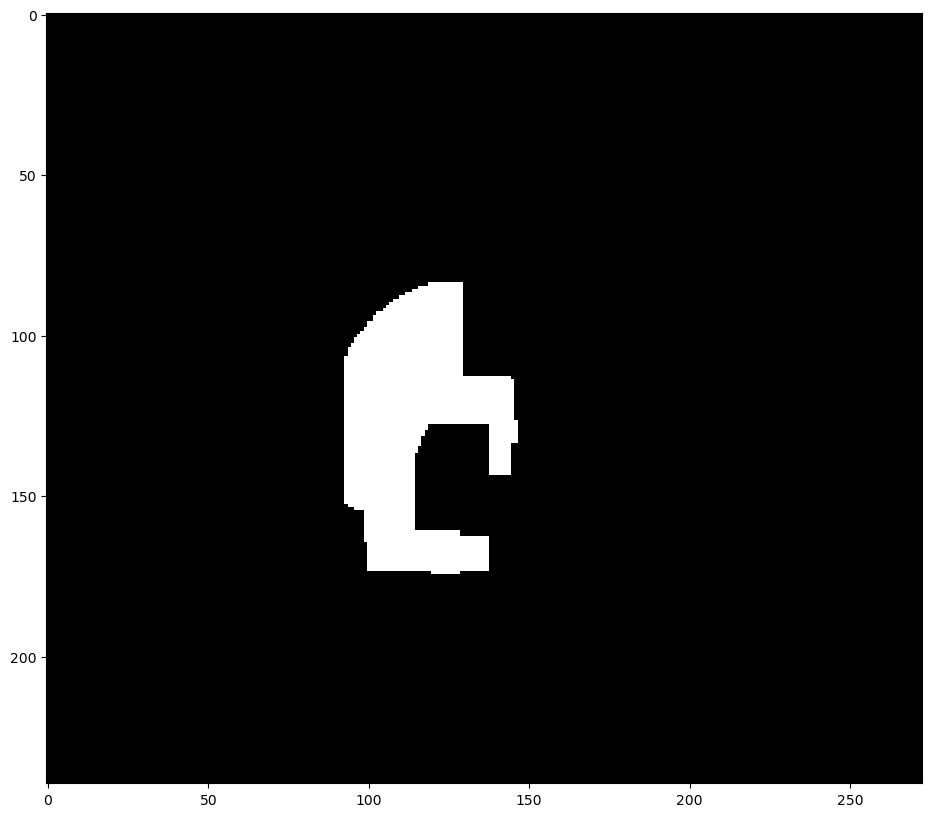

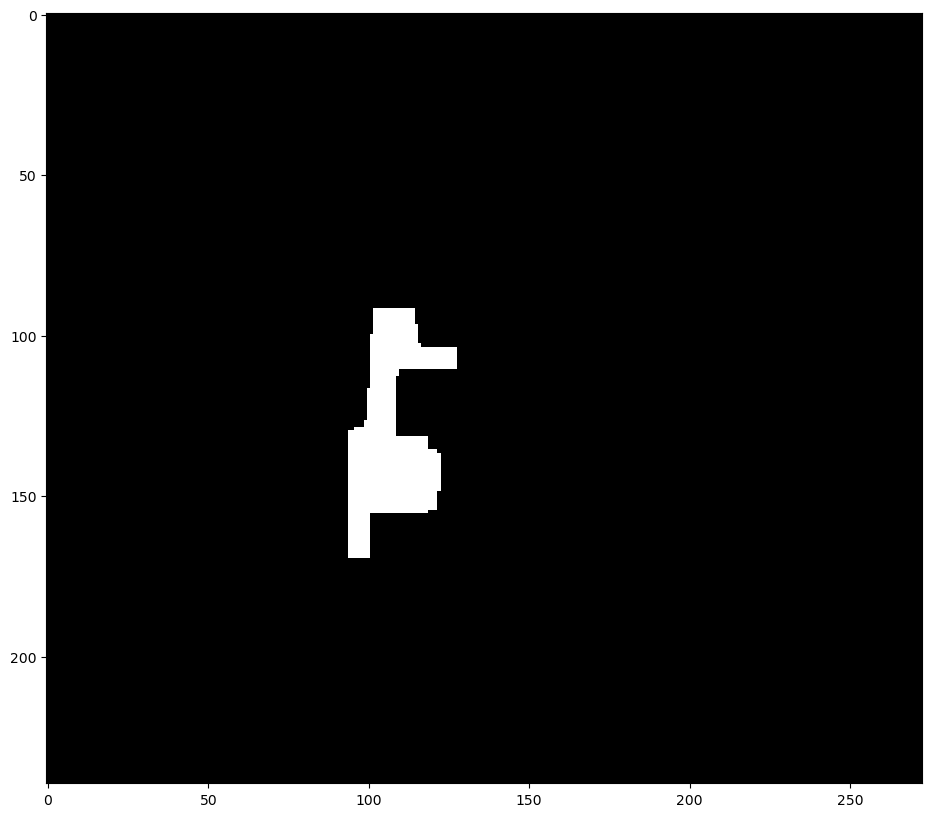

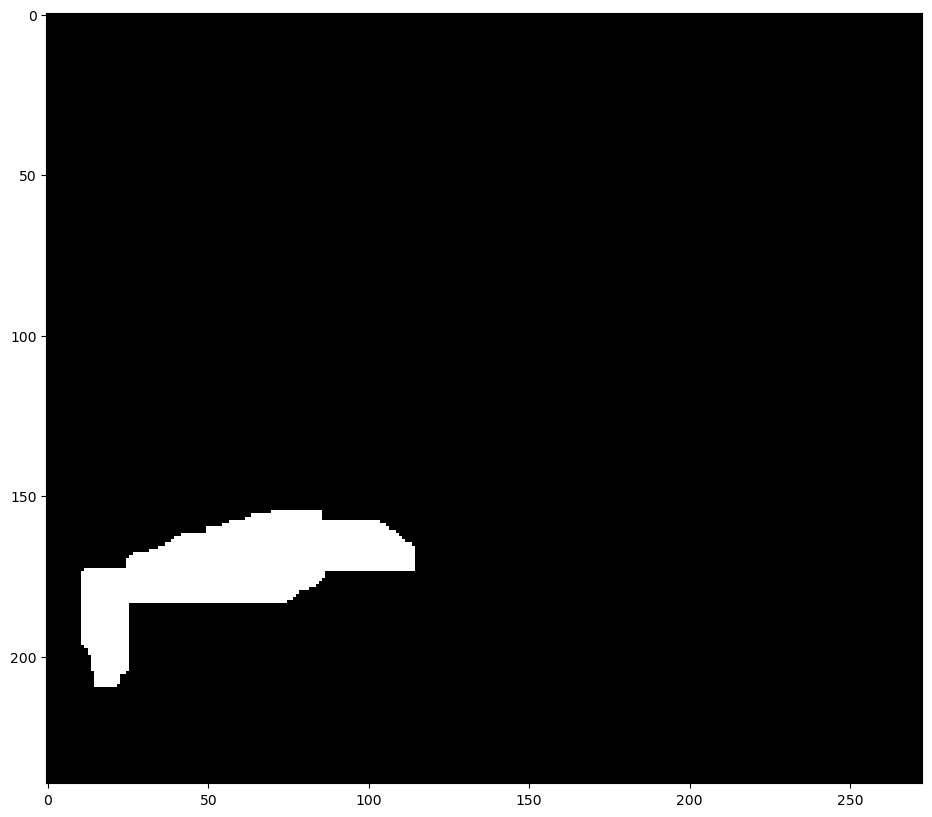

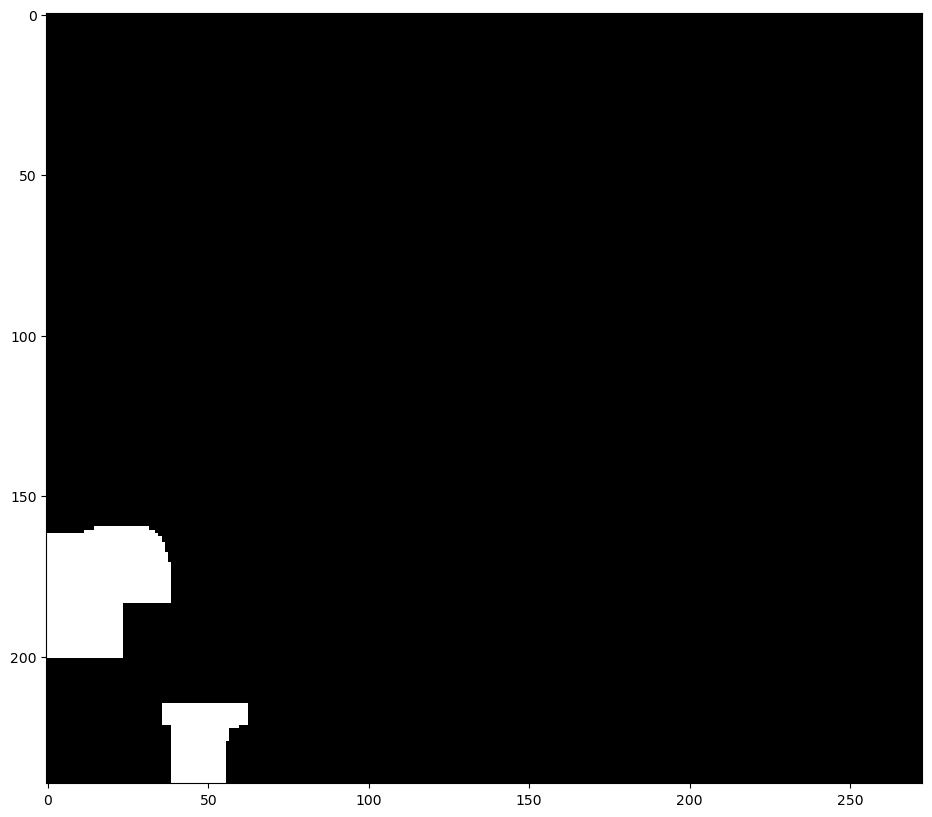

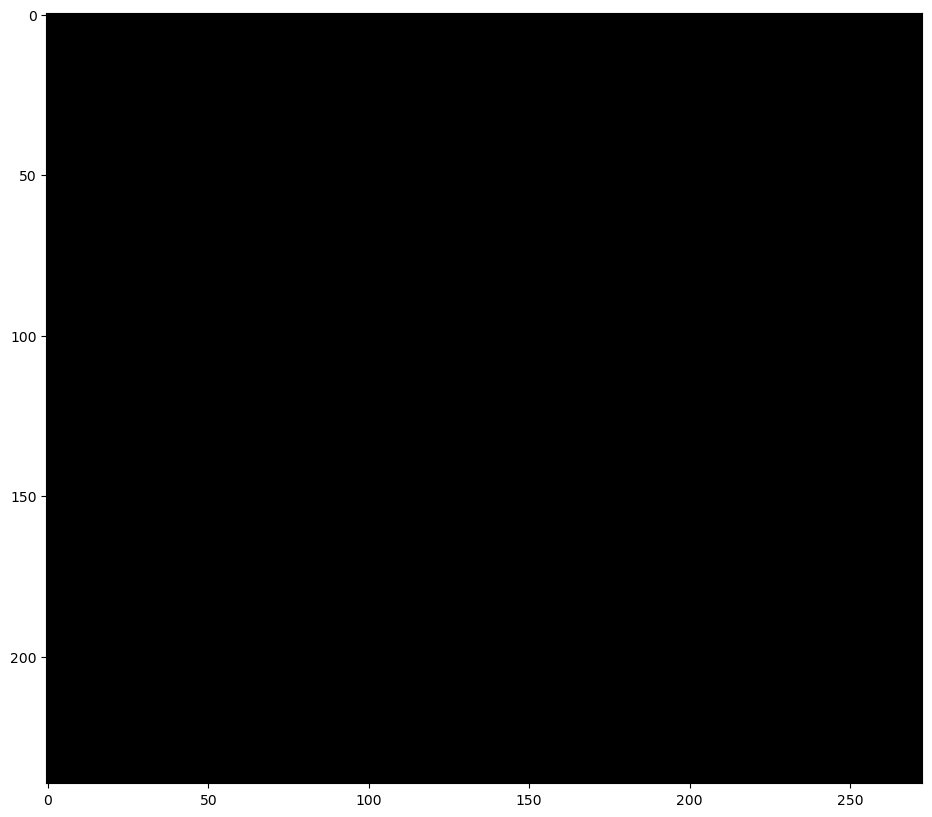

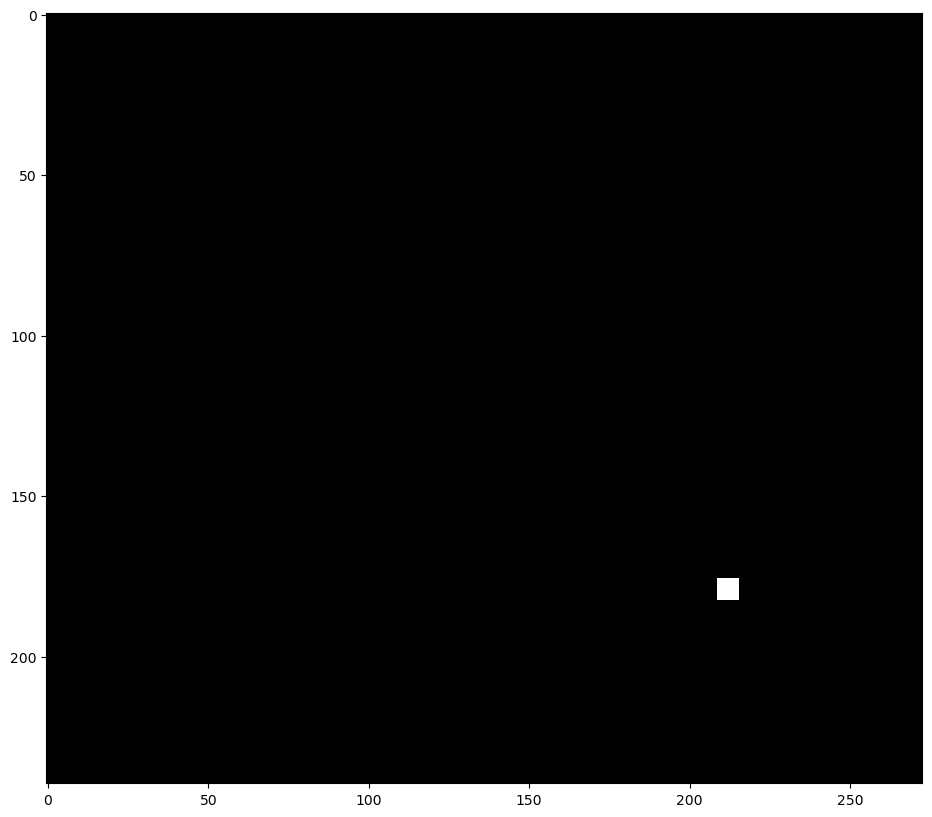

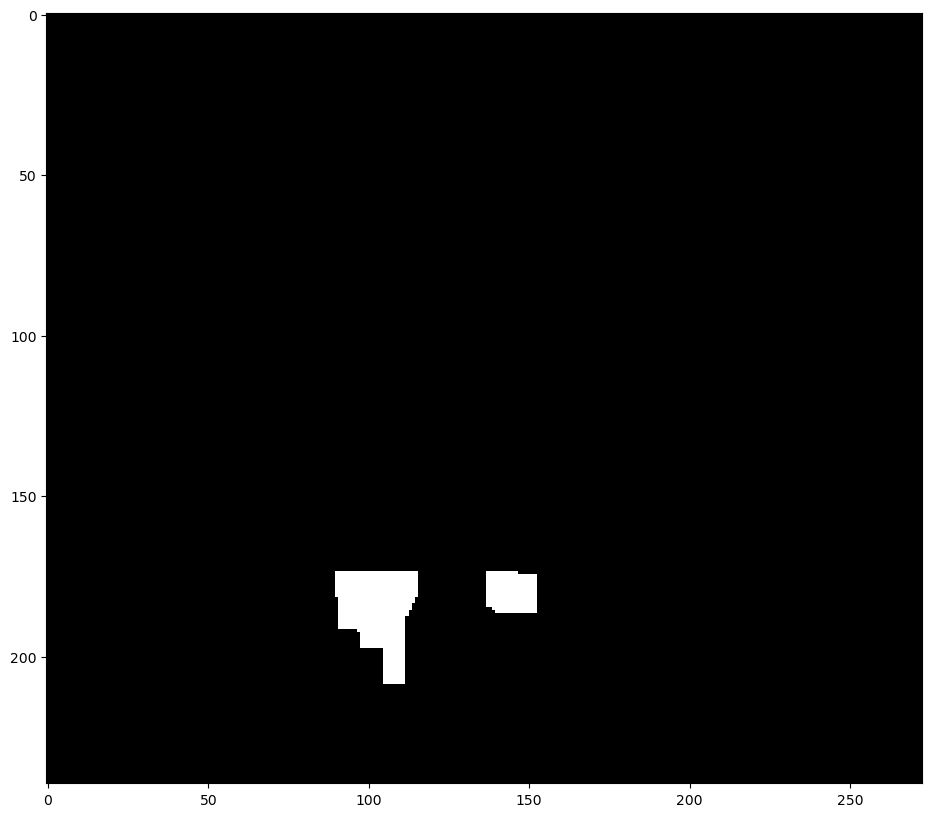

In [22]:
for i in img:
    Cent = Img_Proc(i,50, kernel_o, kernel_c, show_close = True, show_mask = False, save_lim = True )

## Edge detector

In [23]:
## Limizarized images
img_lim = os.listdir("Data/lim")
img_or = img_lim[0]
image = cv2.imread("Data/lim/" + img_or, cv2.IMREAD_GRAYSCALE)

#### Testing diferent edge detectors

In [24]:
# Roberts
edge_roberts = roberts(image)

# Sobel
edge_sobel = sobel(image)

# Scharr
edge_scharr = scharr(image)

# Prewitt
edge_prewitt = prewitt(image)

### Ploting the results

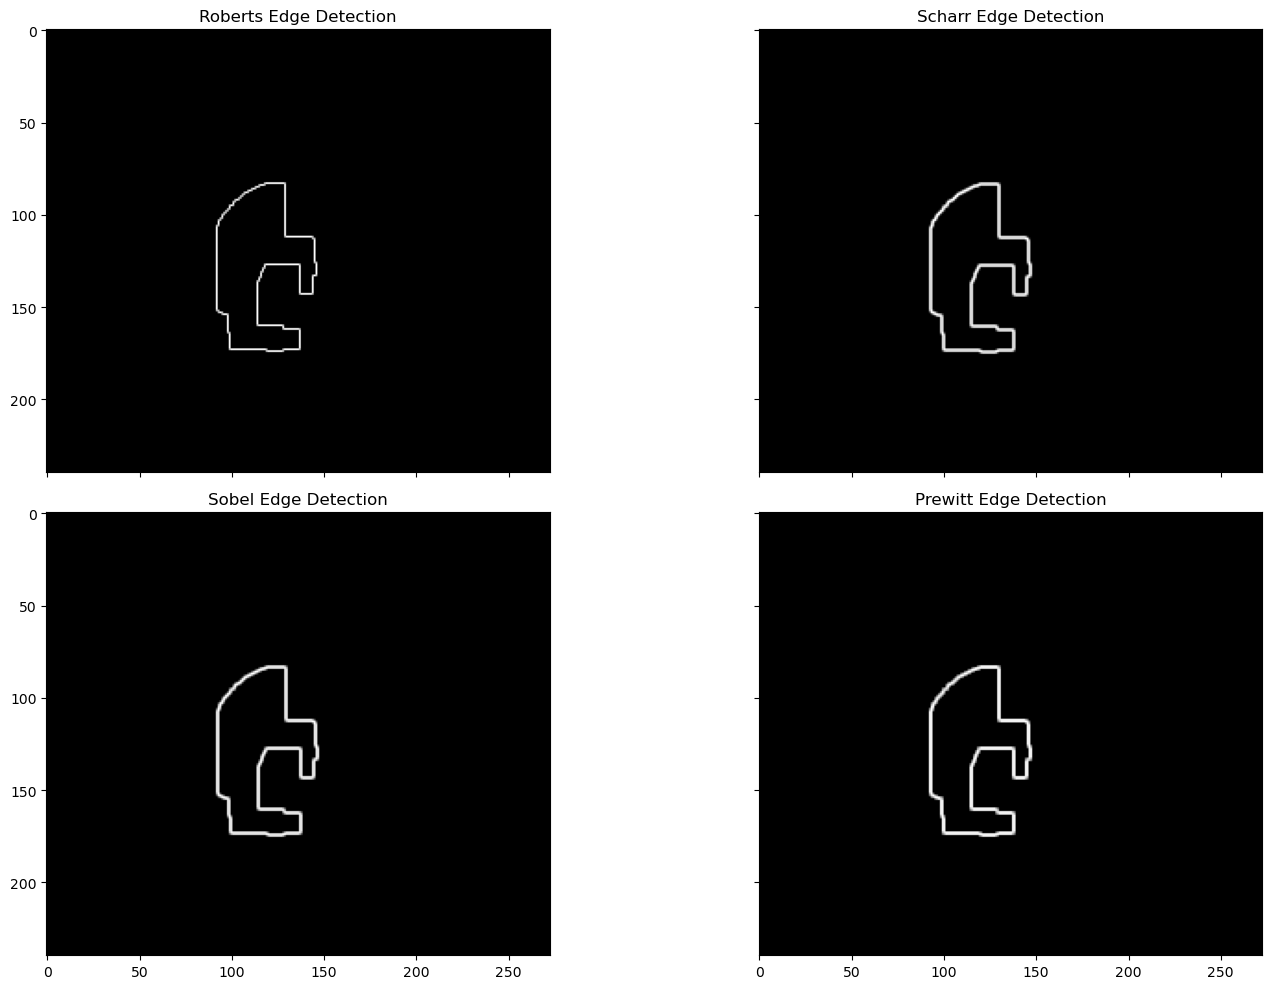

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(16, 10))

ax[0,0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0,0].set_title('Roberts Edge Detection')

ax[1,0].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1,0].set_title('Sobel Edge Detection')

ax[0,1].imshow(edge_scharr, cmap=plt.cm.gray)
ax[0,1].set_title('Scharr Edge Detection')

ax[1,1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1,1].set_title('Prewitt Edge Detection')

plt.tight_layout()
plt.show()

### Canny edge detector

In [26]:
def to_gray(image):
     # If the image is colored, make a grayscale copy
    if image.shape[-1] == 3:           
        b,g,r = cv2.split(image)       # get b,g,r
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_img = image
    return gray_img      

In [27]:
def cannySciKit(image, sigma, low_threshold, high_threshold, use_quantiles = False):
    # Line finding using the Probabilistic Hough Transform
    #image = eval(source)
    gray_img = to_gray(image)

    edges = canny(gray_img, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold, use_quantiles=use_quantiles)

    # Generating figure 2
    fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')

    ax[1].imshow(edges, cmap=cm.gray)
    ax[1].set_title('Canny edges')

    for a in ax:
        a.set_axis_off()

    plt.tight_layout()
    plt.show()
    
    return edges

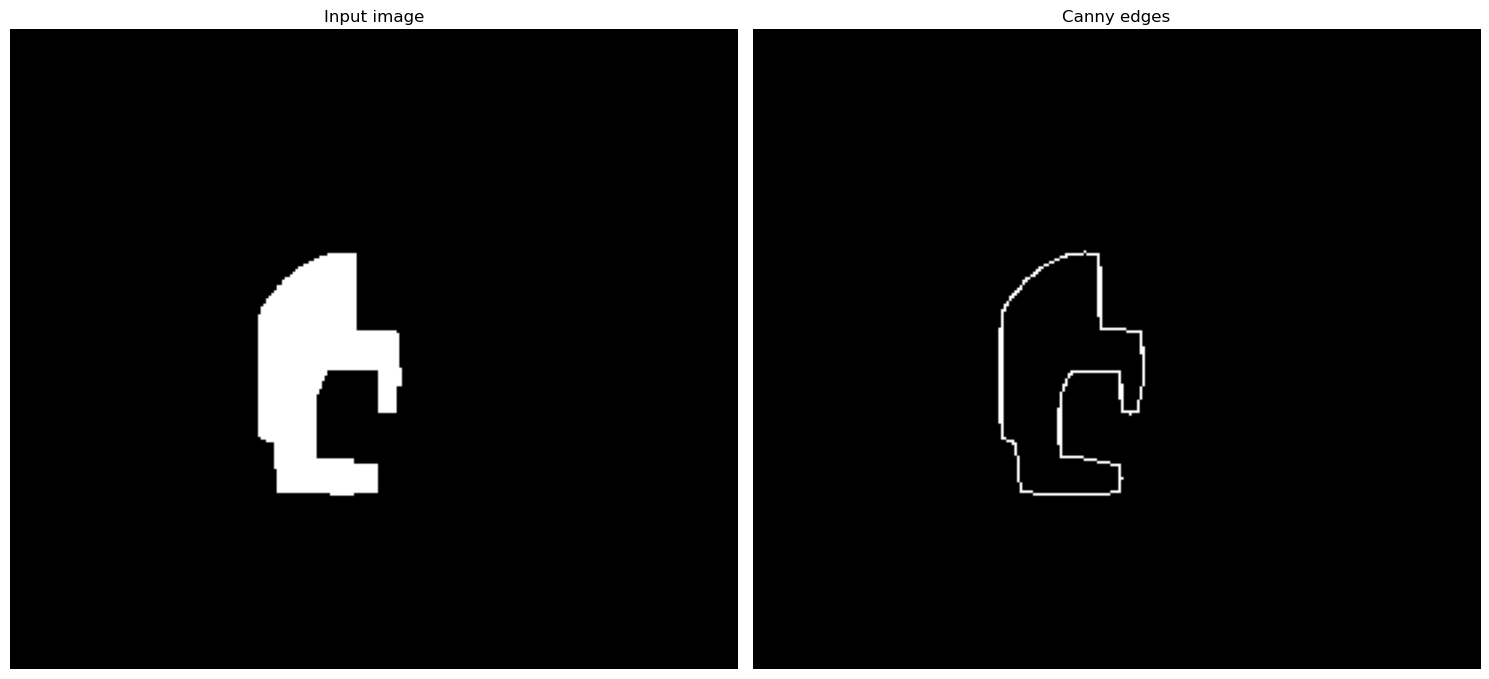

In [28]:
edges = cannySciKit(image, 1, 1, 25)

### Applying the edge detectors in the original images

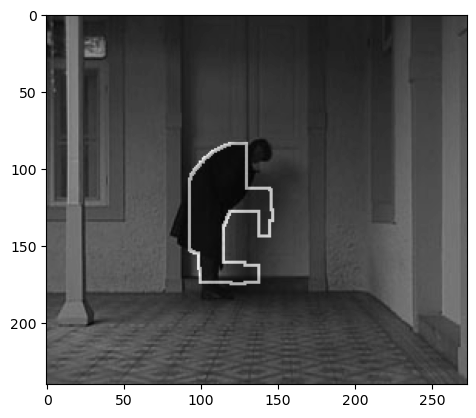

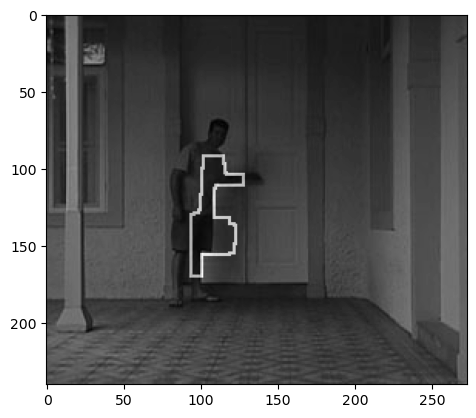

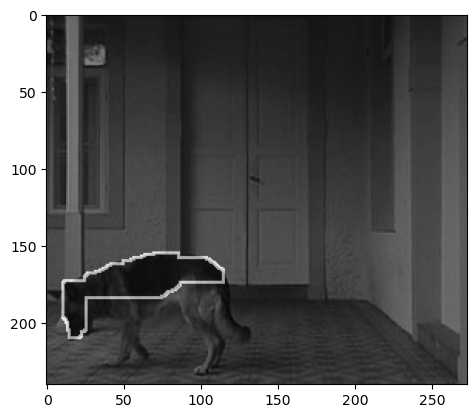

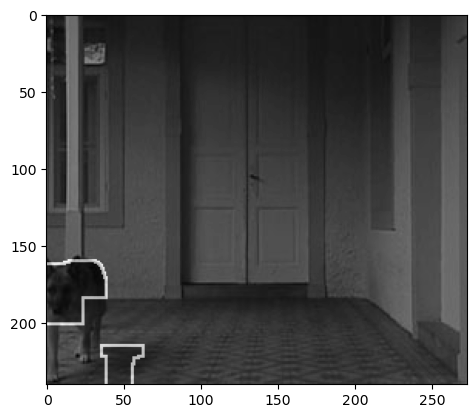

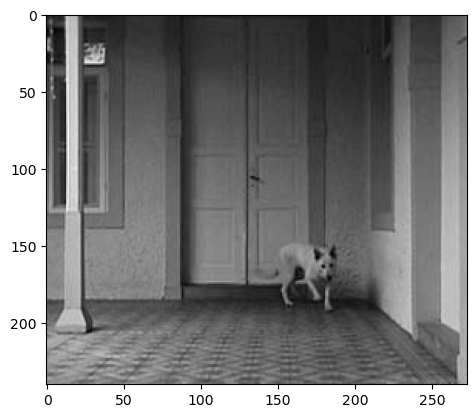

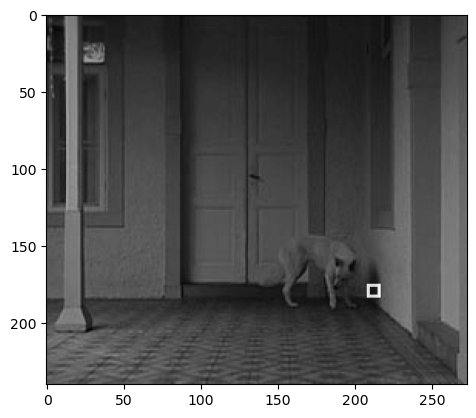

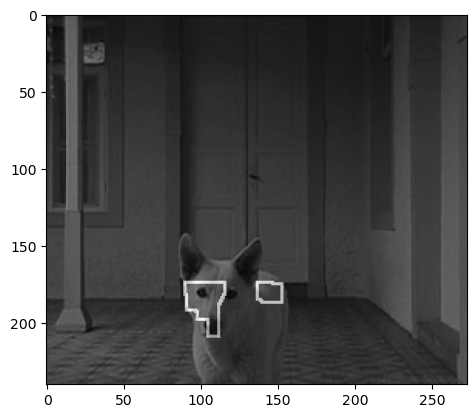

In [29]:
for i,j in enumerate(img):
    
    image_gray = cv2.imread("Data/im/" + j, cv2.IMREAD_GRAYSCALE)
    image_lim = cv2.imread("Data/lim/" + img_lim[i], cv2.IMREAD_GRAYSCALE)
    edge_sobel = sobel(image_lim)
    edge_sobel[edge_sobel > 0] = 255
    plt.imsave('Data/edge/' + j + '_lim.png', edge_sobel, cmap='gray')
    res = image_gray + edge_sobel
    plt.imshow(res, cmap=cm.gray)
    plt.show()

## Convex Hull

#### Convex Hull and Limiarized images

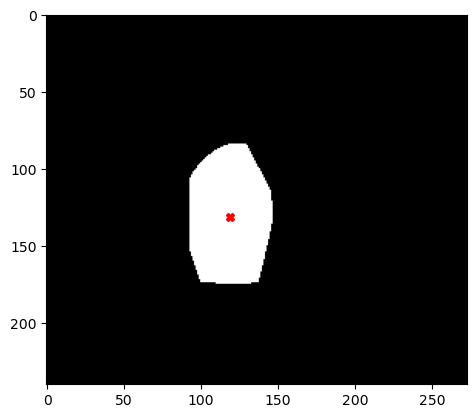

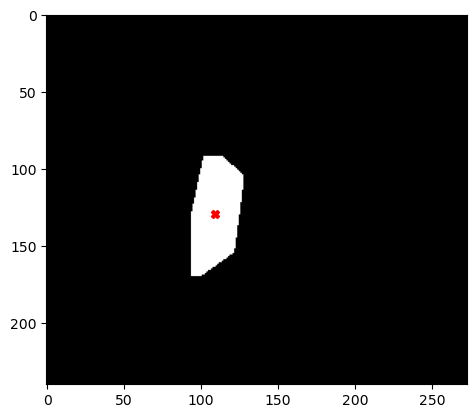

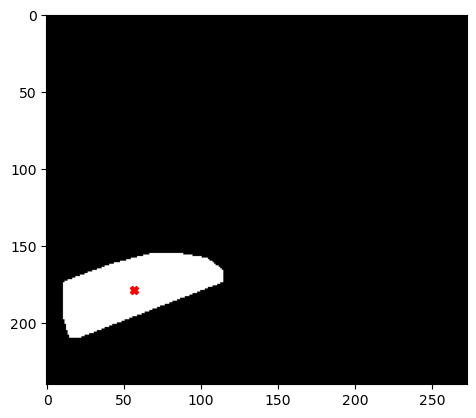

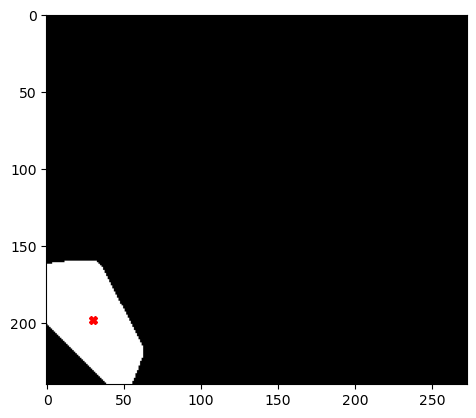

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_8588\1642630433.py:6: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  hull = convex_hull_image(image_lim)


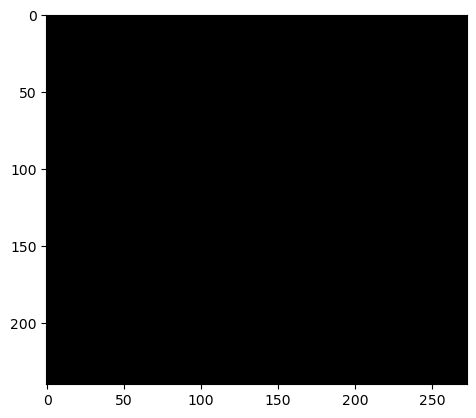

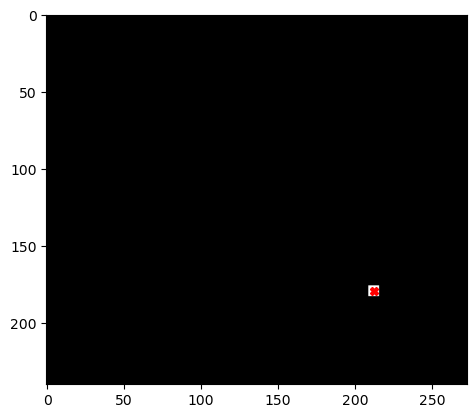

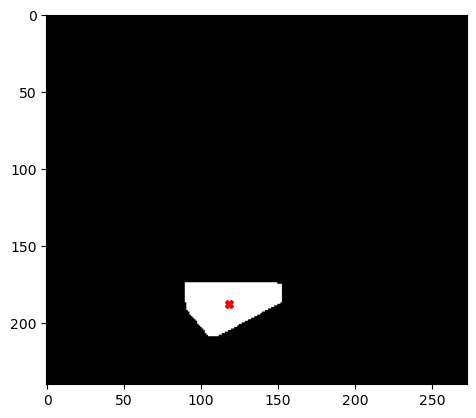

In [30]:
traj_X_ch1 = []
traj_Y_ch1 = []

for i in img_lim:
    image_lim = cv2.imread("Data/lim/" + i, cv2.IMREAD_GRAYSCALE)
    hull = convex_hull_image(image_lim)
    
    traj_X_ch1.append(measure.centroid(hull)[1])
    traj_Y_ch1.append(measure.centroid(hull)[0])
    
    plt.imshow(hull, cmap=cm.gray)
    plt.plot(measure.centroid(hull)[1],measure.centroid(hull)[0],'rX')
    plt.show()

#### Convex Hull and Edge Detector

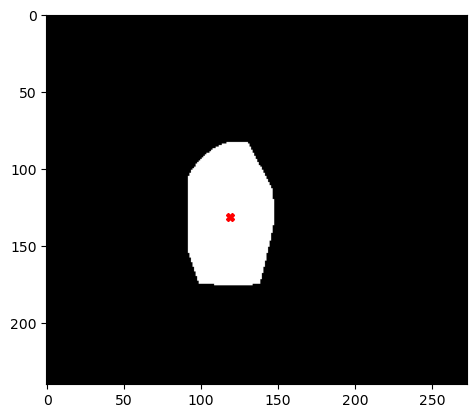

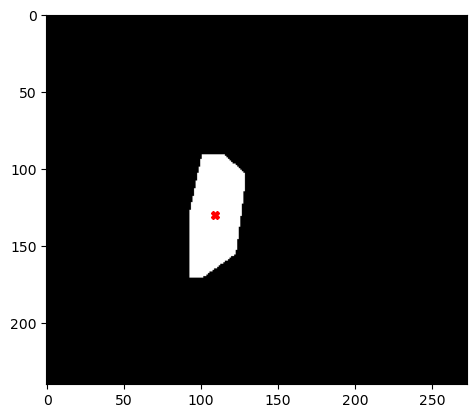

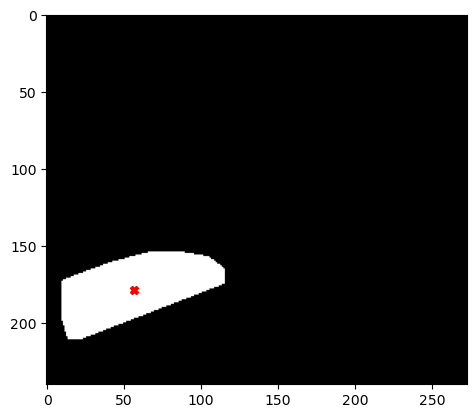

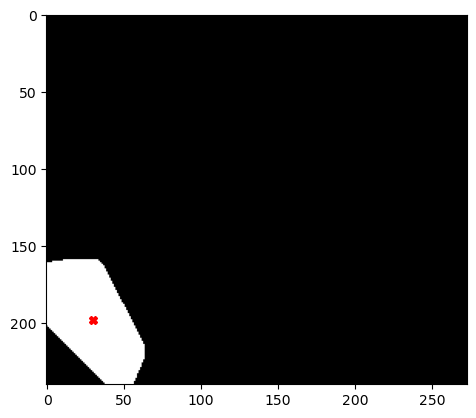

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_8588\661084045.py:8: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  hull = convex_hull_image(image_lim)


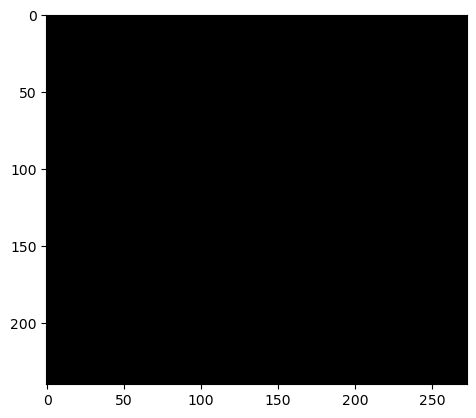

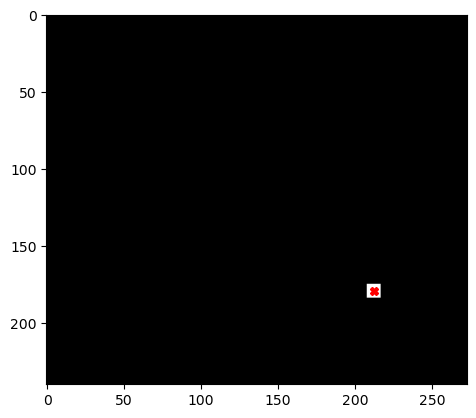

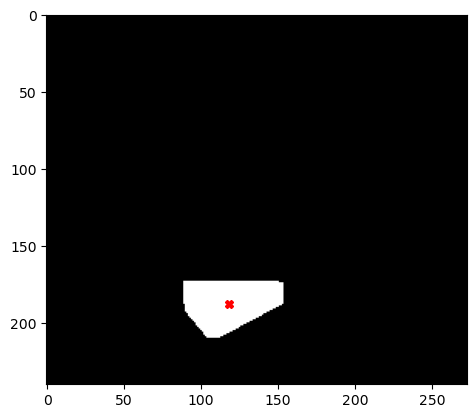

In [31]:
img_edge = os.listdir("Data/edge")

traj_X_ch2 = []
traj_Y_ch2 = []

for i in img_edge:
    image_lim = cv2.imread("Data/edge/" + i, cv2.IMREAD_GRAYSCALE)
    hull = convex_hull_image(image_lim)
    
    
    traj_X_ch2.append(measure.centroid(hull)[1])
    traj_Y_ch2.append(measure.centroid(hull)[0])
    
    plt.plot(measure.centroid(hull)[1],measure.centroid(hull)[0],'rX')
    plt.imshow(hull, cmap=cm.gray)
    plt.show()

## Bounding Rectangle

#### Bounding rectangles and limiarized images

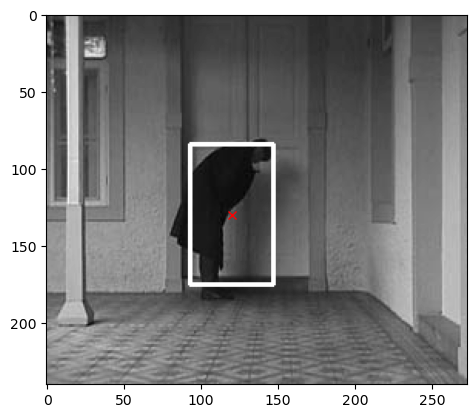

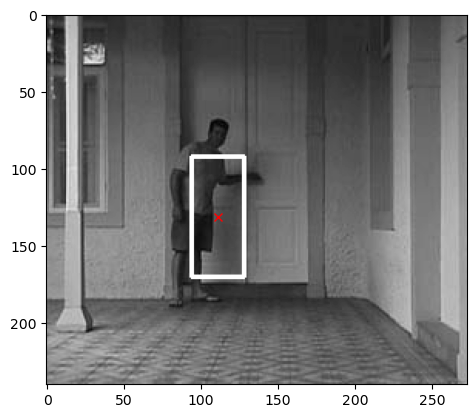

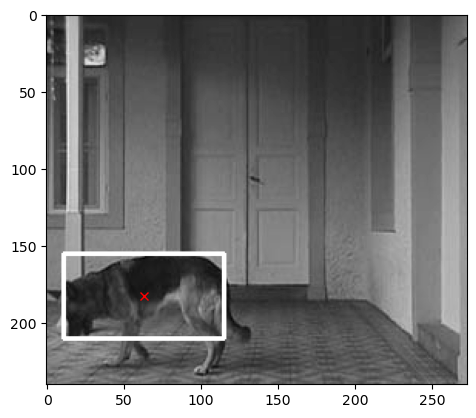

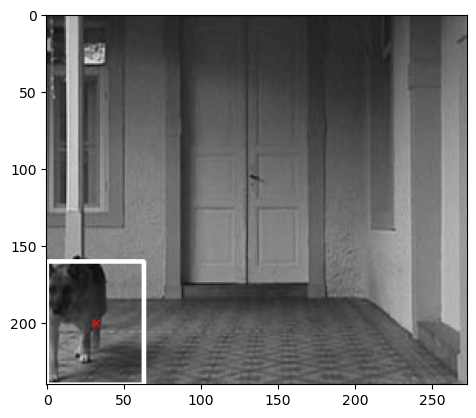

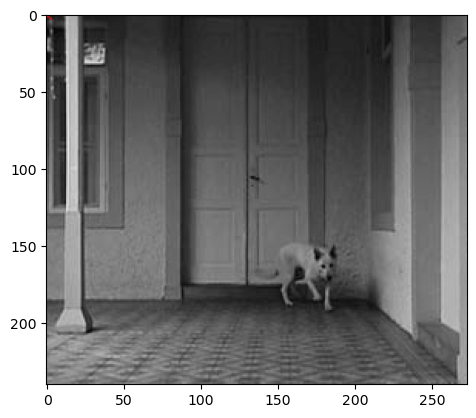

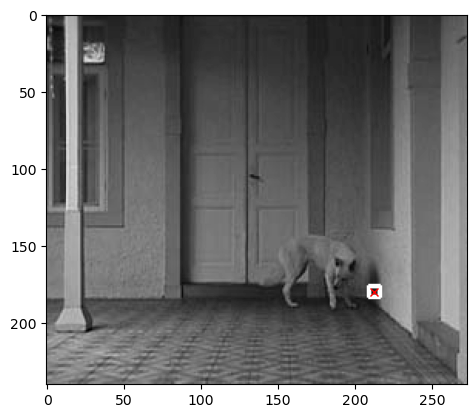

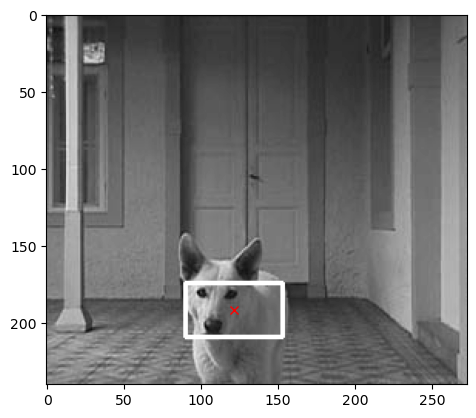

In [32]:
traj_X_bb = []
traj_Y_bb = []


for i,j in enumerate(img):
    
    image_gray = cv2.imread("Data/im/" + j, cv2.IMREAD_GRAYSCALE)
    image_lim = cv2.imread("Data/lim/" + img_lim[i], cv2.IMREAD_GRAYSCALE)
    
    x,y,w,h = cv2.boundingRect(image_lim)
    cv2.rectangle(image_gray,(x,y),(x+w,y+h),(255,255,255),2)
    
    traj_X_bb.append(x + w/2)
    traj_Y_bb.append(y + h/2)
    
    plt.imshow(image_gray, cmap=cm.gray)
    plt.plot(x + w/2, y + h/2, 'rx')
    plt.show()